## 데이터 표준화 이후, 주성분 분석을 실시하여 2차원(1 vs 2 주성분, 1 vs 3 주성분, …) 산점도를 그려라.(목표변수로 색 구분), + 주성분 naming

In [1]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Load

In [2]:
data = pd.read_csv('./csvfiles/유방암.csv')

In [3]:
x = data.drop("diagnosis", axis = 1)

In [4]:
y = data['diagnosis']

In [5]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
x.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# 데이터 표준화

In [7]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
print("Scaled data :\n {}".format(x[:5].round(3)))
print("Shape :\n {}".format(x_scale.shape))

Scaled data :
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0            0.118   
1        20.57         17.77          132.90     1326.0            0.085   
2        19.69         21.25          130.00     1203.0            0.110   
3        11.42         20.38           77.58      386.1            0.142   
4        20.29         14.34          135.10     1297.0            0.100   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.278           0.300                0.147          0.242   
1             0.079           0.087                0.070          0.181   
2             0.160           0.197                0.128          0.207   
3             0.284           0.241                0.105          0.260   
4             0.133           0.198                0.104          0.181   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter 

# PCA 실행

In [8]:
pca = PCA(n_components=30)
cols =[]
for i in range(1,31):
    cols.append('Prin'+str(i))
x_pca = pca.fit_transform(x_scale)
print("PCA Data :\n {}".format(x_pca[:5]))
print("Shape :\n {}".format(x_pca.shape))
ds_x_pca = pd.DataFrame(x_pca, columns=cols)

PCA Data :
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00  3.63373090e+00
  -1.19511012e+00  1.41142445e+00  2.15936987e+00 -3.98407230e-01
  -1.57118359e-01 -8.77401880e-01  2.62955455e-01 -8.59014477e-01
   1.03387665e-01 -6.90804097e-01 -6.01793127e-01  7.45115792e-01
  -2.65470777e-01 -5.49562693e-01 -1.33767500e-01  3.45564905e-01
   9.65148929e-02  6.88499220e-02  8.45185932e-02 -1.75256284e-01
  -1.51020059e-01 -2.01503451e-01 -2.52584993e-01 -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01  1.11826386e+00
   6.21774980e-01  2.86563545e-02  1.33580935e-02  2.40988459e-01
  -7.11904816e-01  1.10699494e+00  8.13119658e-01  1.57922585e-01
  -9.43529283e-01 -6.53475327e-01  8.97486713e-03 -6.48808694e-01
  -1.72122035e-02  3.18297381e-01  2.47564629e-01 -1.14133080e-01
  -7.73274741e-02 -9.45784509e-02 -2.17718064e-01  1.12901180e-02
  -1.70510254e-01 -4.11287846e-02  1.81270166e-01  3.26241827e-02
  -5.68742432e-03 -1.86787626

In [9]:
ds_pca = pd.DataFrame()
# 주성분 분석 모델의 주성분 번호, Eigenvalue, Eigenvalue ratio 등을 데이터 프레임의 형태로 저장
ds_pca["Prin"] = [i for i in range(1,31)]
ds_pca["EigenValues"] = pca.explained_variance_ 
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_
ds_pca["CumsumEigenValueratio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueratio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847
5,6,1.209,0.040,0.888
6,7,0.676,0.023,0.910
7,8,0.477,0.016,0.926
8,9,0.418,0.014,0.940
9,10,0.351,0.012,0.952


In [10]:
ds_feature = pd.DataFrame({"Feature" : x.columns})
# 주성분 Prin 1~6까지의 고유벡터 저장
ds_eigenvectors = pd.concat([ds_feature,pd.DataFrame(pca.components_, columns=cols)], axis = 1)
# ds_eigenvectors

# Screeplot에서 갑자기 꺾이는 부분이 6 차원인 것을 알 수 있다.

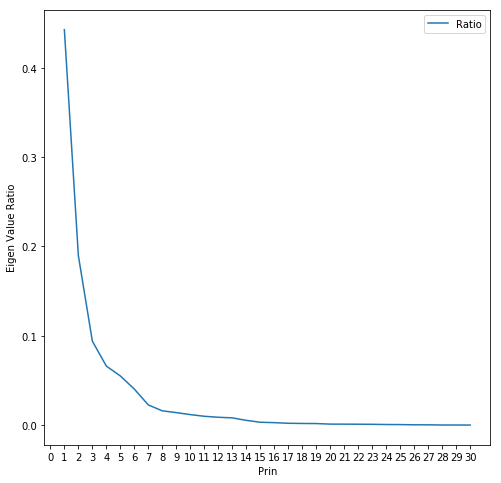

In [18]:
plt.figure(figsize=(8,8))
plt.plot(ds_pca["Prin"], ds_pca["EigenValueRatio"], label = "Ratio")
# 누적된 고유값 비율 그래프 생성
# plt.plot(ds_pca["Prin"], ds_pca["CumsumEigenValueratio"], label = "Cumsum Ratio")

plt.ylabel("Eigen Value Ratio")
plt.xlabel("Prin")
plt.legend(loc="best")
plt.xticks(range(31));

# 차원 축소 후 회귀 모델링

In [12]:
# 회귀분석 패키지 불러오기
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Scree plot을 이용해 선택한 주성분
x_var = ["Prin1", "Prin2","Prin3","Prin4","Prin5", 'Prin6']

ds_x_pca_const = sm.add_constant(ds_x_pca[x_var])

X_train, X_test, y_train, y_test = train_test_split(ds_x_pca_const, y,
                                                   test_size=0.3, random_state=2222)

In [13]:
reg_model = sm.OLS(y_train, X_train)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     169.1
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          2.41e-105
Time:                        19:25:00   Log-Likelihood:                -22.340
No. Observations:                 398   AIC:                             58.68
Df Residuals:                     391   BIC:                             86.59
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6302      0.013     48.605      0.0

* Prin6의 p-valuerk 0.05이상인데, 5차원까지의 pca성분 feature사용을 고려해볼 수 있겠다.

In [14]:
pca_data = ds_x_pca[x_var]

In [15]:
plot_data = pd.concat([y, pca_data], axis=1)

# 1 vs 2, 3, 4, 5, 6 산점도

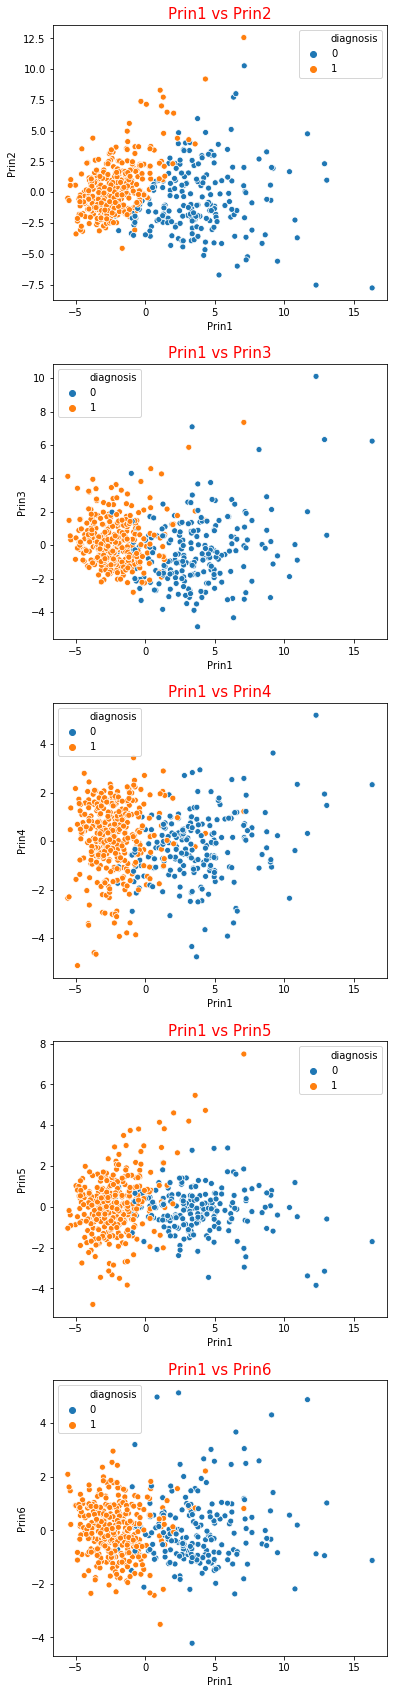

In [16]:
num_col = list(plot_data.columns)
rows = len(num_col)-2

fig, axs = plt.subplots(rows, 1, figsize=(6,30))
fig.subplots_adjust(hspace = 0.23)
axs = axs.ravel()
for j,k in enumerate(num_col[2:]):
    b = sns.scatterplot(x='Prin1',y = k, data=plot_data,ax = axs[j],hue='diagnosis')
    b.set_ylabel(k,fontsize=10)
    b.set_title('Prin1 vs'+ ' '+ k,fontsize=15, color='r')